# Statements

In [1]:
sentence_1 = "i had a great time at the movie it was really funny"
sentence_2 = "i had a great time at the movie but the parking was terrible"
sentence_3 = "i had a great time at the movie but the parking wasn't great"
sentence_4 = "i went to see a movie"

sentences = {
    'sentence_1': sentence_1,
    'sentence_2': sentence_2,
    'sentence_3': sentence_3,
    'sentence_4': sentence_4
}

print(sentences)

{'sentence_1': 'i had a great time at the movie it was really funny', 'sentence_2': 'i had a great time at the movie but the parking was terrible', 'sentence_3': "i had a great time at the movie but the parking wasn't great", 'sentence_4': 'i went to see a movie'}


In [2]:
from textblob import TextBlob
for label, sentence in sentences.items():
    print(label, '->', sentence)
    sentence_score = TextBlob(sentence)
    print(sentence_score.sentiment.polarity,'\n')

sentence_1 -> i had a great time at the movie it was really funny
0.525 

sentence_2 -> i had a great time at the movie but the parking was terrible
-0.09999999999999998 

sentence_3 -> i had a great time at the movie but the parking wasn't great
0.8 

sentence_4 -> i went to see a movie
0.0 



In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader_sentiment = SentimentIntensityAnalyzer()
for label, sentence in sentences.items():
    print(label, '->', sentence)
    print(vader_sentiment.polarity_scores(sentence), '\n')

sentence_1 -> i had a great time at the movie it was really funny
{'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'compound': 0.807} 

sentence_2 -> i had a great time at the movie but the parking was terrible
{'neg': 0.234, 'neu': 0.621, 'pos': 0.144, 'compound': -0.3818} 

sentence_3 -> i had a great time at the movie but the parking wasn't great
{'neg': 0.247, 'neu': 0.611, 'pos': 0.142, 'compound': -0.4387} 

sentence_4 -> i went to see a movie
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} 



# Pre Trained Transformers

In [4]:
import transformers
from transformers import pipeline

sentiment_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [5]:
for label, sentence in sentences.items():
    print(label, '->', sentence)
    print(sentiment_pipeline(sentence), '\n')

sentence_1 -> i had a great time at the movie it was really funny
[{'label': 'POSITIVE', 'score': 0.9998176693916321}] 

sentence_2 -> i had a great time at the movie but the parking was terrible
[{'label': 'NEGATIVE', 'score': 0.9977464079856873}] 

sentence_3 -> i had a great time at the movie but the parking wasn't great
[{'label': 'NEGATIVE', 'score': 0.9984902143478394}] 

sentence_4 -> i went to see a movie
[{'label': 'POSITIVE', 'score': 0.9802700281143188}] 



In [6]:
sentiment_pipeline = pipeline('sentiment-analysis', model='finiteautomata/bertweet-base-sentiment-analysis')
for label, sentence in sentences.items():
    print(label, '->', sentence)
    print(sentiment_pipeline(sentence), '\n')

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use cpu


sentence_1 -> i had a great time at the movie it was really funny
[{'label': 'POS', 'score': 0.9923344254493713}] 

sentence_2 -> i had a great time at the movie but the parking was terrible
[{'label': 'NEG', 'score': 0.5355538725852966}] 

sentence_3 -> i had a great time at the movie but the parking wasn't great
[{'label': 'POS', 'score': 0.6234413385391235}] 

sentence_4 -> i went to see a movie
[{'label': 'NEU', 'score': 0.9007400870323181}] 



# Practical Task

In [7]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import transformers
from transformers import pipeline
import re

In [8]:
data = pd.read_csv('book_reviews_sample.csv')
data.head()

,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


In [9]:
data['reviewText_cleaned'] = data['reviewText'].str.lower()
data['reviewText_cleaned'] = data['reviewText_cleaned'].apply(lambda review: re.sub(r'[^\w\s]','',review))
data.head()

,index,reviewText,rating,reviewText_cleaned
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...


In [10]:
vader_sentiment = SentimentIntensityAnalyzer()
data['vader_sentiment_score'] = data['reviewText_cleaned'].apply(lambda review: vader_sentiment.polarity_scores(review)['compound'])
bins = [-1, -0.1, 0.1, 1]
names = ['negative', 'neutral', 'positive']
data['vader_sentiment_label'] = pd.cut(data['vader_sentiment_score'], bins, labels=names)
data.head()

,index,reviewText,rating,reviewText_cleaned,vader_sentiment_score,vader_sentiment_label
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684,positive
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325,positive
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740,positive
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652,positive
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767,negative


<Axes: xlabel='vader_sentiment_label'>

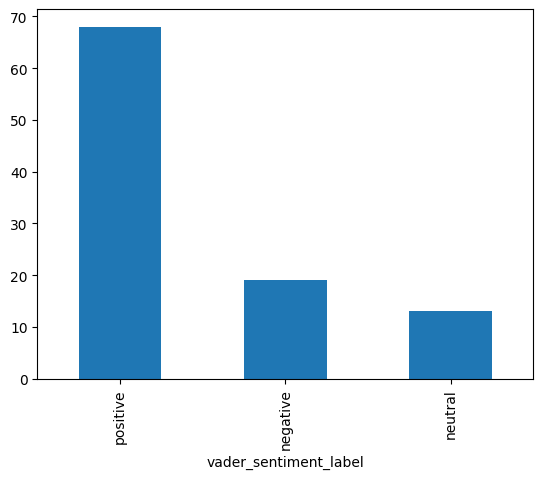

In [11]:
data['vader_sentiment_label'].value_counts().plot.bar()

In [12]:
transformer_sentiment = pipeline('sentiment-analysis')
transformer_list = []

for review in data['reviewText_cleaned'].values:
    sentiment_score = transformer_sentiment(review)
    transformer_list.append([sentiment['label'] for sentiment in sentiment_score])

data['sentiment_label'] = transformer_list
data.head()

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


,index,reviewText,rating,reviewText_cleaned,vader_sentiment_score,vader_sentiment_label,sentiment_label
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684,positive,[POSITIVE]
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325,positive,[POSITIVE]
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740,positive,[NEGATIVE]
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652,positive,[NEGATIVE]
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767,negative,[NEGATIVE]


<Axes: xlabel='sentiment_label'>

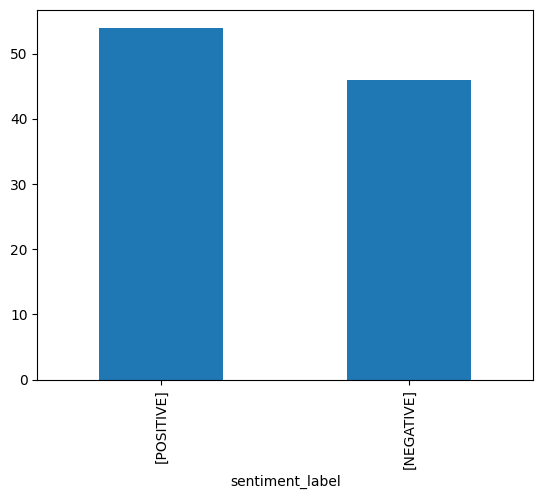

In [13]:
data['sentiment_label'].value_counts().plot.bar()